In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
import FinanceDataReader as fdr

In [3]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [4]:
data = fdr.DataReader(STOCK_CODE)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1999-02-04 to 2023-05-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


In [6]:
# 주가 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# 훈련 및 테스트 데이터셋 분할
train_data = scaled_data[:800]  # 훈련 데이터셋
test_data = scaled_data[800:]   # 테스트 데이터셋


In [7]:
# 시퀀스 데이터 생성 함수
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [8]:
# 시퀀스 길이 설정
sequence_length = 10

# 시퀀스 데이터 생성
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [9]:
# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
# LSTM 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 2.1476e-04
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 2.9224e-05
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.5432e-05
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 1.6072e-05
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 1.2952e-05
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3625e-05
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3631e-05
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 1.2427e-05
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 1.4419e-05
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 1.5229e-05
Epoch 11/50
50/50 [==============================] - 0s 2ms/step - loss: 1.2264e-05
Epoch 12/50
50/50 [==============================] - 0s 2ms/step - loss: 1.1838e-05
E

In [11]:
X_test

array([[[0.05721157],
        [0.06224484],
        [0.06627146],
        ...,
        [0.06492925],
        [0.06269224],
        [0.06403445]],

       [[0.06224484],
        [0.06627146],
        [0.06492925],
        ...,
        [0.06269224],
        [0.06403445],
        [0.06302779]],

       [[0.06627146],
        [0.06492925],
        [0.06772552],
        ...,
        [0.06403445],
        [0.06302779],
        [0.0648174 ]],

       ...,

       [[0.71366255],
        [0.71030703],
        [0.71925508],
        ...,
        [0.703596  ],
        [0.71366255],
        [0.70918852]],

       [[0.71030703],
        [0.71925508],
        [0.71254404],
        ...,
        [0.71366255],
        [0.70918852],
        [0.72261059]],

       [[0.71925508],
        [0.71254404],
        [0.7047145 ],
        ...,
        [0.70918852],
        [0.72261059],
        [0.74721772]]])

In [12]:
# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 예측 결과 역전환 (원래 스케일로 변환)
y_pred = scaler.inverse_transform(y_pred)

# 예측 결과 출력
print(y_pred)


163/163 [==============================] - 0s 997us/step
[[ 7498.097 ]
 [ 7478.12  ]
 [ 7517.8228]
 ...
 [50879.824 ]
 [51175.723 ]
 [51898.543 ]]


In [13]:

# 주가 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# 훈련 데이터셋 생성
train_data = scaled_data[:800]

# 시퀀스 데이터 생성 함수
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 시퀀스 길이 설정
sequence_length = 10

# 시퀀스 데이터 생성
X_train, y_train = create_sequences(train_data, sequence_length)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# LSTM 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=16)

# 테스트 데이터셋 생성
test_data = scaled_data[800-sequence_length:]  # 테스트 시작 지점 설정

# 향후 5~10일 동안의 주가 예측
num_predictions = 5  # 예측할 일 수
predictions = []  # 예측 결과를 저장할 리스트

# 시퀀스를 통한 다음날 주가 예측
current_sequence = test_data[-sequence_length:]
for _ in range(num_predictions):
    input_data = current_sequence.reshape(1, sequence_length, 1)
    next_prediction = model.predict(input_data)[0][0]
    predictions.append(next_prediction)
    current_sequence = np.append(current_sequence[1:], next_prediction)

# 예측 결과 역전환 (원래 스케일로 변환)
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))




Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 2.2999e-04
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 5.9868e-05
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.4945e-05
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 1.8622e-05
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3917e-05
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 1.5878e-05
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3345e-05
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 1.4808e-05
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 1.4426e-05
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3247e-05
Epoch 11/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3328e-05
Epoch 12/50
50/50 [==============================] - 0s 2ms/step - loss: 1.6127e-05
E

In [14]:
# 예측 결과 출력
print(predictions)

[[59103.266]
 [56486.504]
 [54075.965]
 [51608.492]
 [49136.21 ]]


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1999-02-04 to 2023-05-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


In [16]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

In [17]:
# '년', '월', '일' 필드를 'date' 필드로 변경
data['date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [18]:
data

,Open,High,Low,Close,Volume,Change,Year,Month,Day,date
Date,,,,,,,,,,
1999-02-04,1702,1712,1663,1702,363810,NaN,1999,2,4,1999-02-04
1999-02-05,1692,1761,1653,1761,695955,0.034665,1999,2,5,1999-02-05
1999-02-08,1680,1751,1680,1702,380690,-0.033504,1999,2,8,1999-02-08
1999-02-09,1682,1698,1657,1675,381820,-0.015864,1999,2,9,1999-02-09
1999-02-10,1653,1675,1604,1634,664282,-0.024478,1999,2,10,1999-02-10
...,...,...,...,...,...,...,...,...,...,...
2023-05-16,65800,65900,65300,65400,12334657,0.013953,2023,5,16,2023-05-16
2023-05-17,65900,65900,64800,65000,10745504,-0.006116,2023,5,17,2023-05-17
2023-05-18,66000,66200,65700,66200,14431704,0.018462,2023,5,18,2023-05-18


In [24]:
# 주가 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# 훈련 데이터셋 생성
train_data = scaled_data[:800]

# 시퀀스 데이터 생성 함수
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 시퀀스 길이 설정
sequence_length = 10

# 시퀀스 데이터 생성
X_train, y_train = create_sequences(train_data, sequence_length)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# LSTM 모델 훈련
model.fit(X_train, y_train, epochs=5000, batch_size=1600)

Epoch 1/5000
1/1 [==============================] - 1s 698ms/step - loss: 8.5138e-04
Epoch 2/5000
1/1 [==============================] - 0s 12ms/step - loss: 5.8916e-04
Epoch 3/5000
1/1 [==============================] - 0s 14ms/step - loss: 4.0100e-04
Epoch 4/5000
1/1 [==============================] - 0s 15ms/step - loss: 2.6748e-04
Epoch 5/5000
1/1 [==============================] - 0s 14ms/step - loss: 1.8610e-04
Epoch 6/5000
1/1 [==============================] - 0s 15ms/step - loss: 1.4708e-04
Epoch 7/5000
1/1 [==============================] - 0s 15ms/step - loss: 1.4256e-04
Epoch 8/5000
1/1 [==============================] - 0s 14ms/step - loss: 1.6010e-04
Epoch 9/5000
1/1 [==============================] - 0s 16ms/step - loss: 1.8363e-04
Epoch 10/5000
1/1 [==============================] - 0s 14ms/step - loss: 1.9878e-04
Epoch 11/5000
1/1 [==============================] - 0s 15ms/step - loss: 1.9901e-04
Epoch 12/5000
1/1 [==============================] - 0s 17ms/step - loss:

In [20]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 15ms/step
Predicted prices for the next 5 days:
Day 1: 59143.43
Day 2: 56000.49
Day 3: 53303.52
Day 4: 50746.78
Day 5: 48271.74


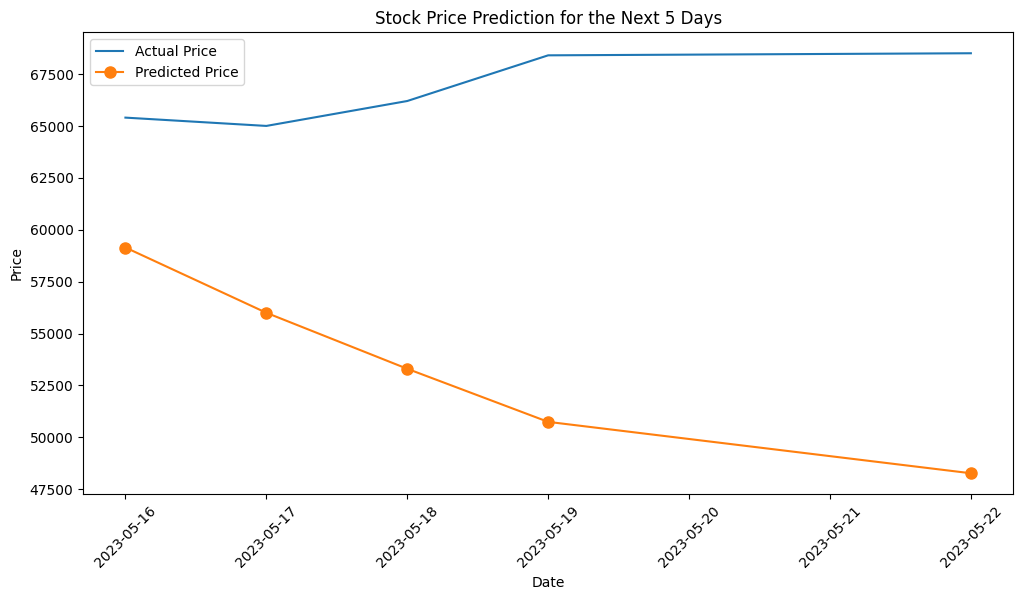

In [25]:
# 현재일로부터 향후 5일 주가 예측
current_sequence = scaled_data[-sequence_length:]
predicted_prices = []
for _ in range(5):
    input_data = current_sequence.reshape(1, sequence_length, 1)
    next_prediction = model.predict(input_data)[0][0]
    predicted_prices.append(next_prediction)
    current_sequence = np.append(current_sequence[1:], next_prediction)

# 예측 결과 역전환 (원래 스케일로 변환)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# 예측 결과 출력
print("Predicted prices for the next 5 days:")
for i in range(5):
    print("Day {}: {:.2f}".format(i+1, predicted_prices[i][0]))

# 차트 그리기
actual_prices = data['Close'].values[-5:]  # 현재일로부터 향후 5일의 실제 주가
dates = data['date'].values[-5:]  # 현재일로부터 향후 5일의 날짜

plt.figure(figsize=(12, 6))
plt.plot(dates, actual_prices, label='Actual Price')
plt.plot(dates, predicted_prices, marker='o', markersize=8, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction for the Next 5 Days')
plt.xticks(rotation=45)
plt.legend()
plt.show()
